['Setosa' 'Versicolor' 'Virginica']
Train data accuracy: 1.0
Test data accuracy: 0.9666666666666667
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        16
  Versicolor       0.80      1.00      0.89         4
   Virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.93      0.97      0.95        30
weighted avg       0.97      0.97      0.97        30



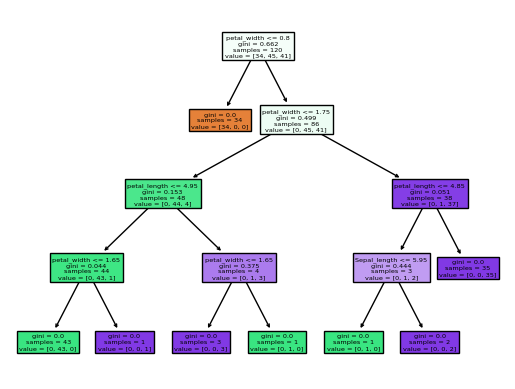

In [ ]:
import pandas as pd
data = pd.read_csv('iris.csv')
# print(data)
Y = data['variety'].values
X = data.drop(['variety'], axis = 1).values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train,y_train)
print(tree_model.classes_)
from sklearn.metrics import accuracy_score
y_pred_train = tree_model.predict(X_train)
y_pred_test = tree_model.predict(X_test)
print("Train data accuracy:",accuracy_score(y_train, y_pred_train))
print("Test data accuracy:",accuracy_score(y_test, y_pred_test))
from sklearn import metrics
print(metrics.classification_report(y_pred_test, y_test))
from sklearn import tree
import matplotlib.pyplot as plt
fn = ['Sepal_length', 'Sepal_width', 'petal_length','petal_width']
tree.plot_tree(tree_model, feature_names=fn, filled=True)
plt.show()

In [ ]:
import numpy as np

new_features = np.array([5, 2.8, 1.6, 4.5])
prediction = tree_model.predict(new_features.reshape(1, -1))
# tree.plot_tree(tree_model, feature_names=new_features, filled=True)
# plt.show()
print(prediction)

['Versicolor']


max_depth:  1
['Setosa' 'Versicolor' 'Virginica']
Train data accuracy: 0.6583333333333333
Test data accuracy: 0.7
train data


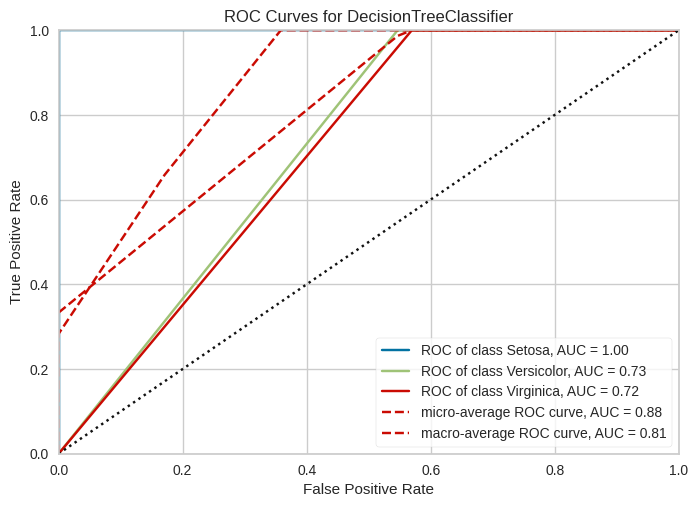

test data


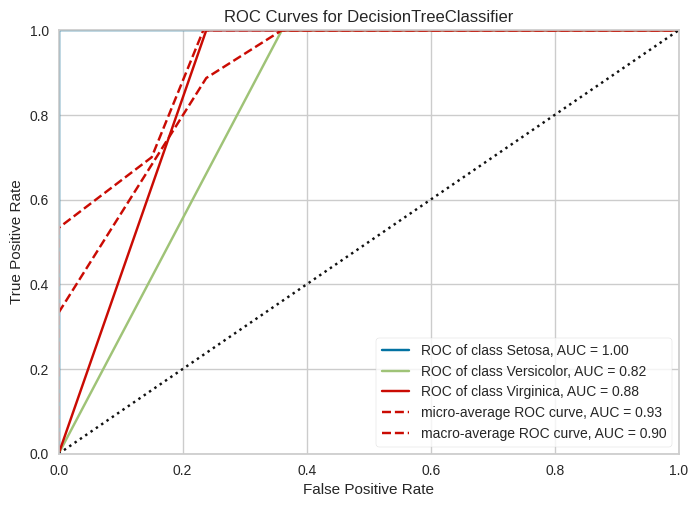



max_depth:  2
['Setosa' 'Versicolor' 'Virginica']
Train data accuracy: 0.9583333333333334
Test data accuracy: 0.9666666666666667
train data


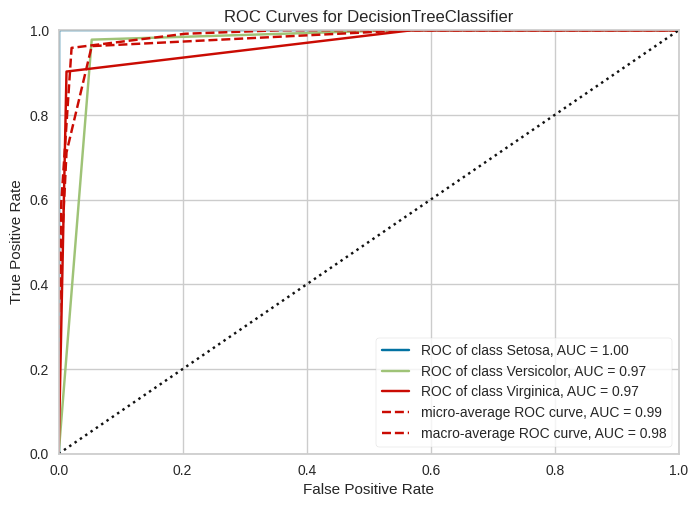

test data


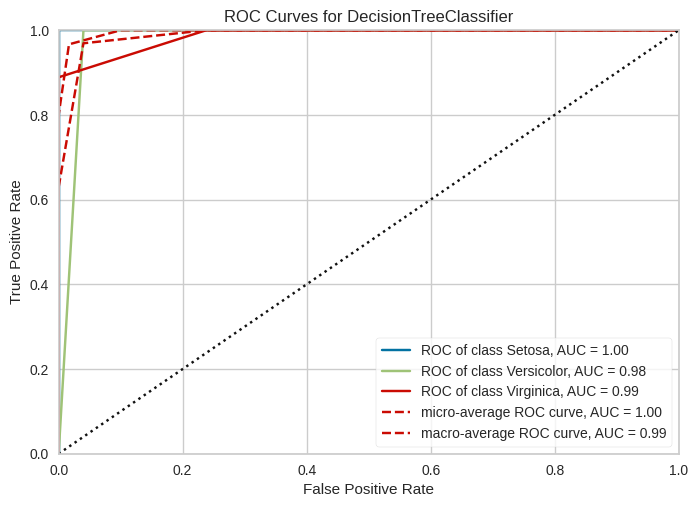



max_depth:  3
['Setosa' 'Versicolor' 'Virginica']
Train data accuracy: 0.975
Test data accuracy: 0.9666666666666667
train data


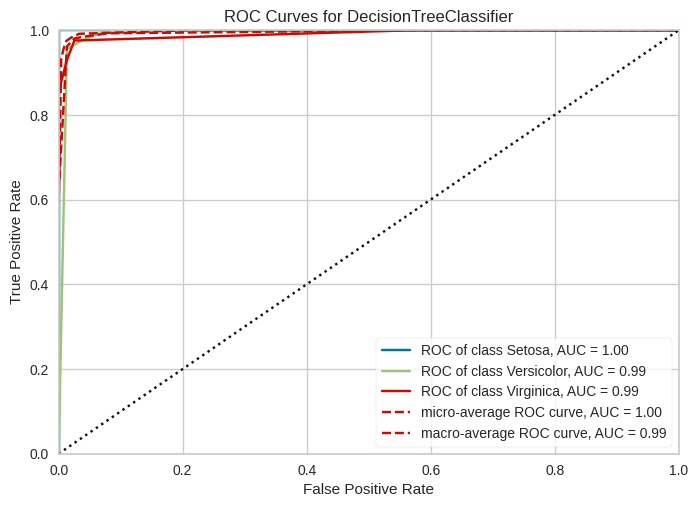

test data


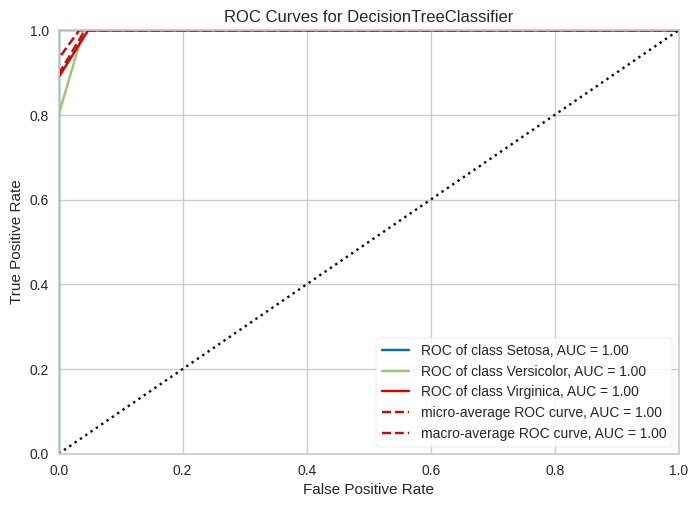



max_depth:  4
['Setosa' 'Versicolor' 'Virginica']
Train data accuracy: 1.0
Test data accuracy: 0.9666666666666667
train data


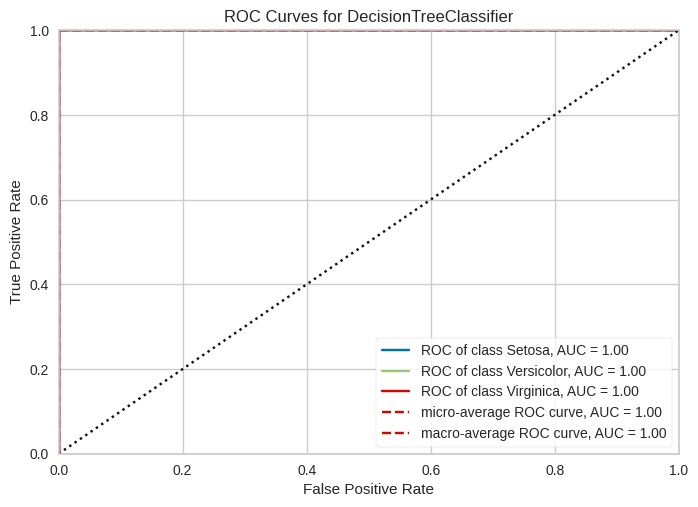

test data


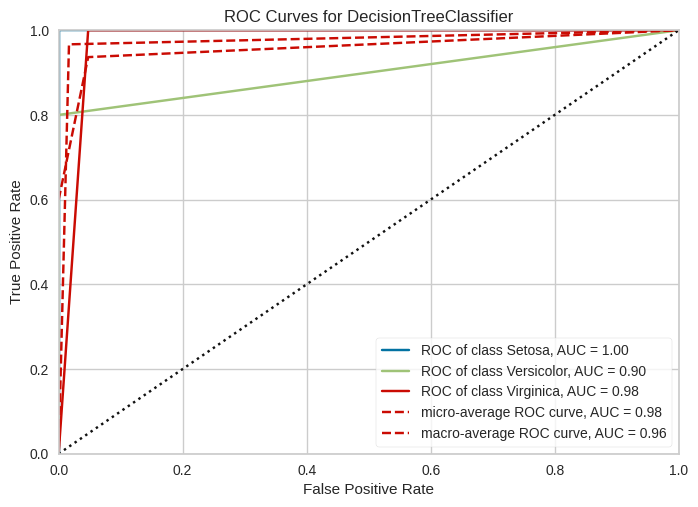



max_depth:  5
['Setosa' 'Versicolor' 'Virginica']
Train data accuracy: 1.0
Test data accuracy: 0.9666666666666667
train data


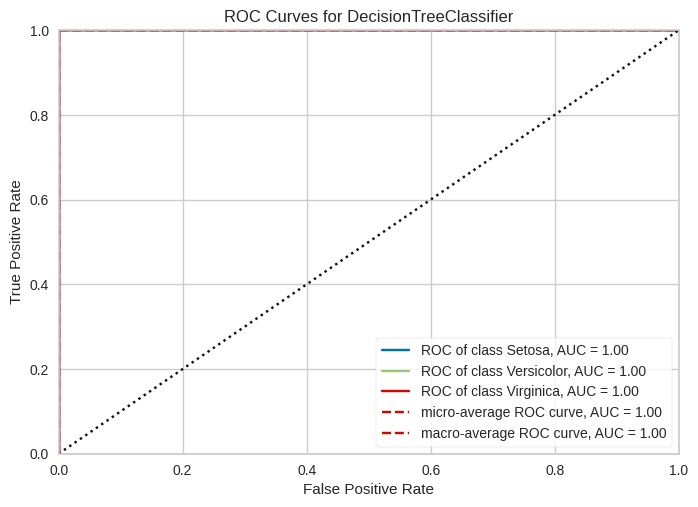

test data


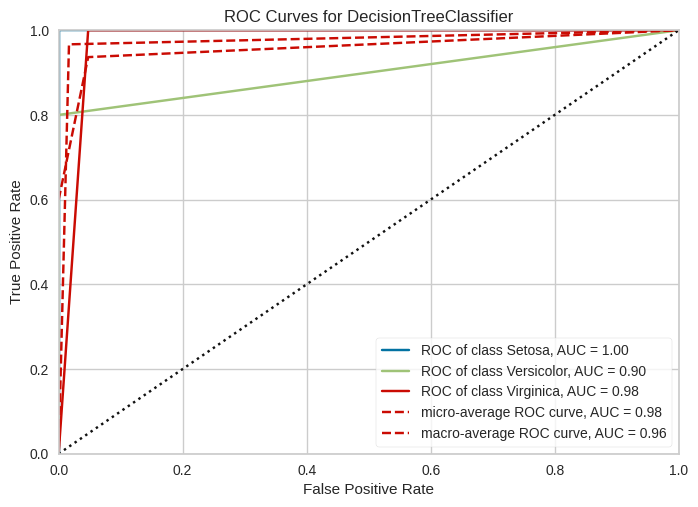



max_depth:  6
['Setosa' 'Versicolor' 'Virginica']
Train data accuracy: 1.0
Test data accuracy: 0.9666666666666667
train data


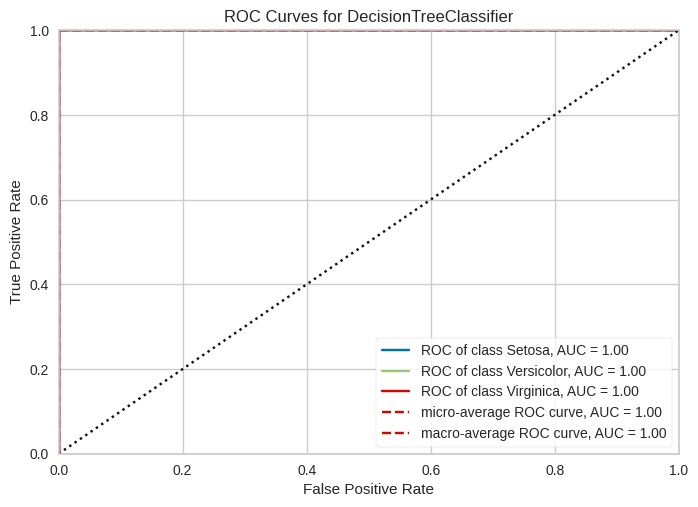

test data


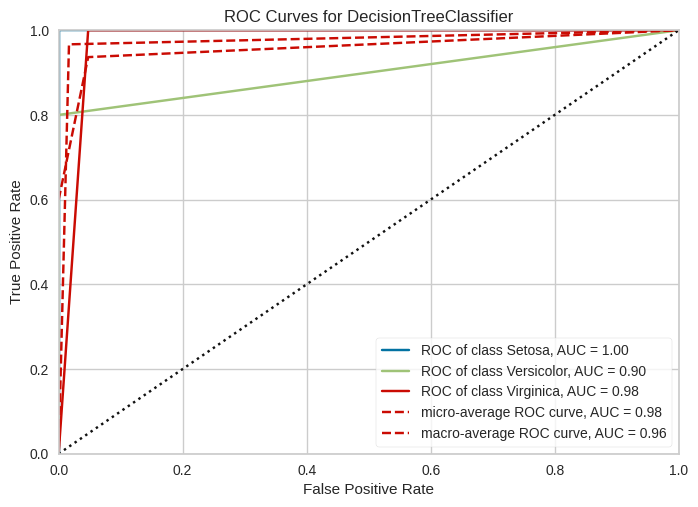

In [ ]:
train = []
test = []
for i in range(1,7):
  depth = i
  tree_params = {'criterion' :{'entropy'} ,'max-depth' : depth}
  tree_model = DecisionTreeClassifier(criterion ='entropy' ,max_depth = depth)
  tree_model.fit(X_train,y_train)
  print(f'max_depth: ',depth)
  print(tree_model.classes_)
  from sklearn.metrics import accuracy_score
  y_pred_train = tree_model.predict(X_train)
  y_pred_test = tree_model.predict(X_test)
  train_score = accuracy_score(y_train, y_pred_train)
  train.append(train_score)
  test_score = accuracy_score(y_test, y_pred_test)
  test.append(test_score)
  print("Train data accuracy:",train_score)
  print("Test data accuracy:",test_score)
  from yellowbrick.classifier import ROCAUC
  print('train data')
  visualizer = ROCAUC(tree_model, classes=['Setosa','Versicolor','Virginica'])
  visualizer.fit(X_train, y_train)
  visualizer.score(X_train, y_train)
  visualizer.show()
  from yellowbrick.classifier import ROCAUC
  print('test data')
  visualizer = ROCAUC(tree_model, classes=['Setosa','Versicolor','Virginica'])
  visualizer.fit(X_train, y_train)
  visualizer.score(X_test, y_test)
  visualizer.show()
  print('\n')


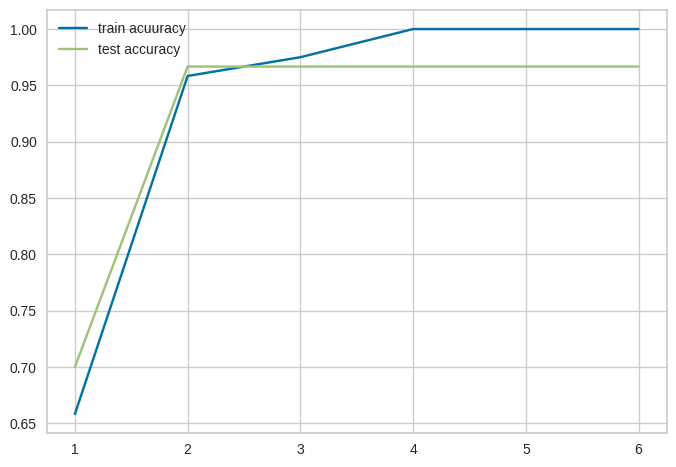

In [ ]:
# x_test = test
# x_train = train
y = range(1,7)
plt.plot(y, train, label = "train acuuracy")
plt.plot(y, test, label = "test accuracy")
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
acc = []
for i in range(5,21,5):
  depth = range(1,7)
  tree_model = DecisionTreeClassifier()
  tree_params = {'criterion' :['gini','entropy', 'log_loss'] ,'max_depth' : depth}
  grid_model = GridSearchCV(tree_model, tree_params, cv= i, scoring='accuracy')
  grid_model.fit(X_train, y_train)
  acc.append(f'number_CV : {i} \n CV accuracy : {grid_model.best_score_*100} % \n Best Parameters: {grid_model.best_params_}')

In [ ]:
for j in acc:
  print(j, "\n")

number_CV : 5 
 CV accuracy : 97.5 % 
 Best Parameters: {'criterion': 'gini', 'max_depth': 3} 

number_CV : 10 
 CV accuracy : 95.83333333333333 % 
 Best Parameters: {'criterion': 'gini', 'max_depth': 6} 

number_CV : 15 
 CV accuracy : 96.66666666666667 % 
 Best Parameters: {'criterion': 'log_loss', 'max_depth': 5} 

number_CV : 20 
 CV accuracy : 95.83333333333334 % 
 Best Parameters: {'criterion': 'entropy', 'max_depth': 6} 



In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
def data_preparation(data):
 #print missing value
 print(data.isna().sum())
 #fill missing value
 data['Age'].fillna(data['Age'].mode()[0], inplace=True)
 data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
 print(data.isna().sum())
 dummy = pd.get_dummies(data['Sex'])
 data = pd.concat([data, dummy], axis = 'columns')
 dummy = pd.get_dummies(data['Embarked'])
 data = pd.concat([data, dummy], axis = 'columns')
 data.drop(['Sex','PassengerId','Name', 'Cabin', 'Ticket', 'Embarked'], axis=1, inplace=True)
 label_encoder = preprocessing.LabelEncoder()
 data['Pclass']= label_encoder.fit_transform(data['Pclass'])
 #print(data.head())
 return data

data = pd.read_csv('Titanic-Dataset.csv')
new_data = data_preparation(data)
print(new_data)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
     Survived  Pclass   Age  SibSp  Parch     Fare  female  male  C  Q  S
0           0       2  22.0      1      0   7.2500       0     1  0  0  1
1           1       0  38.0      1      0  71.2833       1     0  1  0  0
2           1       2  26.0      0      0   7.9250       1     0  0  0  1
3           1       0  35.0      1      0  53.1000       1     0  0  0  1
4           0       2  35.0      0      0   8.0500       0     1  0  0  1
..        ...     ...   ...    ...    ...      ...     ...   ... .. .. ..


In [ ]:
Y = new_data['Pclass']
X = new_data.drop(['Pclass'], axis = 1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)
accu = []
for i in range(5,21,5):
  depth = range(1,7)
  tree_model = DecisionTreeClassifier()
  tree_params = {'criterion' :['gini','entropy', 'log_loss'] ,'max_depth' : depth}
  grid_model = GridSearchCV(tree_model, tree_params, cv= i, scoring='accuracy')
  grid_model.fit(X_train, y_train)
  accu.append(f'number_CV : {i} \n CV accuracy : {grid_model.best_score_*100} % \n Best Parameters: {grid_model.best_params_}')

In [ ]:
for j in accu:
  print(j, "\n")

number_CV : 5 
 CV accuracy : 88.90180242292918 % 
 Best Parameters: {'criterion': 'gini', 'max_depth': 5} 

number_CV : 10 
 CV accuracy : 88.76369327073552 % 
 Best Parameters: {'criterion': 'gini', 'max_depth': 4} 

number_CV : 15 
 CV accuracy : 88.9066193853428 % 
 Best Parameters: {'criterion': 'gini', 'max_depth': 4} 

number_CV : 20 
 CV accuracy : 88.89682539682539 % 
 Best Parameters: {'criterion': 'gini', 'max_depth': 4} 



Train data accuracy: 0.9002808988764045
Test data accuracy: 0.9162011173184358
train data


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


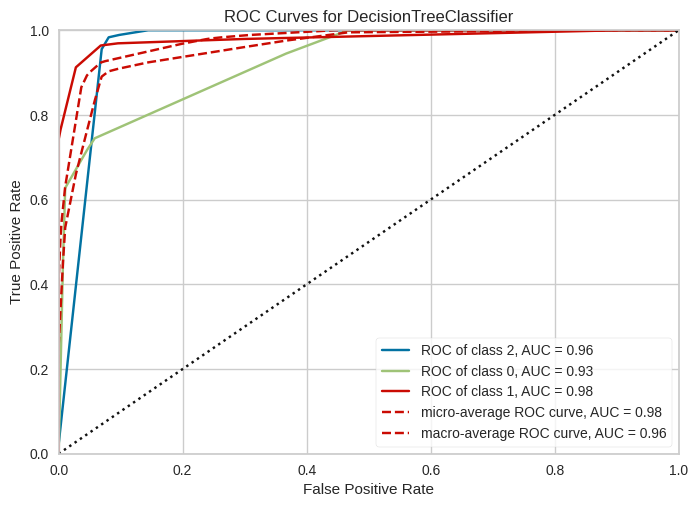

test data


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


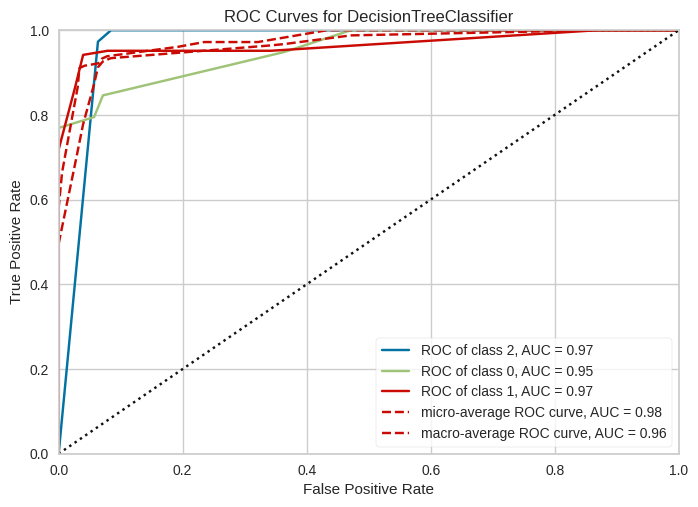

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
tree_model = DecisionTreeClassifier(criterion ='gini' ,max_depth = 4)
tree_model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_pred_train = tree_model.predict(X_train)
y_pred_test = tree_model.predict(X_test)
train_score = accuracy_score(y_train, y_pred_train)
train.append(train_score)
test_score = accuracy_score(y_test, y_pred_test)
test.append(test_score)
print("Train data accuracy:",train_score)
print("Test data accuracy:",test_score)
from yellowbrick.classifier import ROCAUC
print('train data')
visualizer = ROCAUC(tree_model, classes= new_data['Pclass'].unique())
visualizer.fit(X_train, y_train)
visualizer.score(X_train, y_train)
visualizer.show()
from yellowbrick.classifier import ROCAUC
print('test data')
visualizer = ROCAUC(tree_model, classes= new_data['Pclass'].unique())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score
knn = KNeighborsClassifier()
for range_k in range(50, 501,50):

    knn_params = {'n_neighbors': [range_k] ,'weights': ["uniform", "distance"],  'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto']}
    grid_model = GridSearchCV(knn, knn_params, cv=10, scoring='accuracy')
    grid_model.fit(X_train, y_train)
    print('Cross-Validated accuracy : ', grid_model.best_score_*100, '%',
    ',Best K-value : ', grid_model.best_params_)

y_pred = grid_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

Cross-Validated accuracy :  82.72691705790297 % ,Best K-value :  {'algorithm': 'ball_tree', 'n_neighbors': 50, 'weights': 'distance'}
Cross-Validated accuracy :  81.03873239436619 % ,Best K-value :  {'algorithm': 'ball_tree', 'n_neighbors': 100, 'weights': 'distance'}
Cross-Validated accuracy :  81.17762128325509 % ,Best K-value :  {'algorithm': 'ball_tree', 'n_neighbors': 150, 'weights': 'distance'}
Cross-Validated accuracy :  79.9158841940532 % ,Best K-value :  {'algorithm': 'ball_tree', 'n_neighbors': 200, 'weights': 'distance'}
Cross-Validated accuracy :  78.36658841940533 % ,Best K-value :  {'algorithm': 'ball_tree', 'n_neighbors': 250, 'weights': 'distance'}
Cross-Validated accuracy :  75.8313771517997 % ,Best K-value :  {'algorithm': 'ball_tree', 'n_neighbors': 300, 'weights': 'distance'}
Cross-Validated accuracy :  74.71048513302033 % ,Best K-value :  {'algorithm': 'ball_tree', 'n_neighbors': 350, 'weights': 'distance'}
Cross-Validated accuracy :  74.28794992175274 % ,Best K-va

Train data accuracy: 0.9971910112359551
Test data accuracy: 0.8156424581005587
train data


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


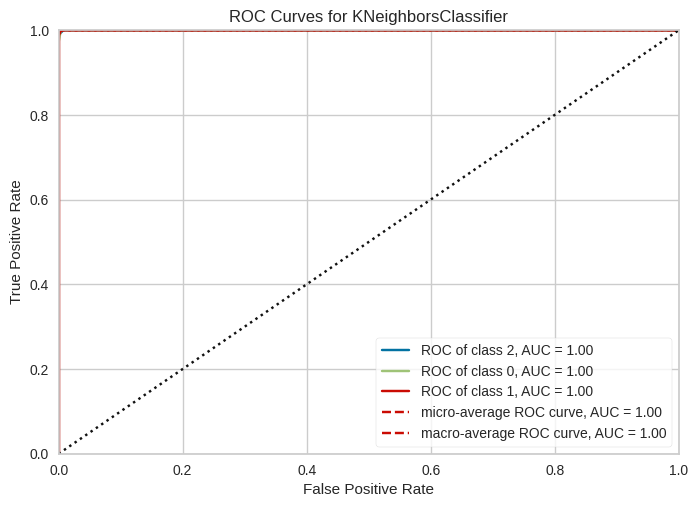

test data


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


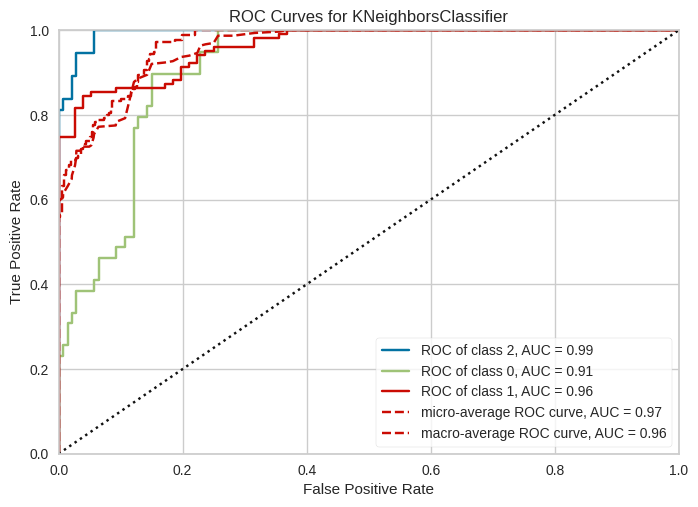

In [ ]:
knn_model = KNeighborsClassifier(algorithm ='ball_tree',n_neighbors = 50, weights = 'distance')
knn_model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_pred_train = knn_model.predict(X_train)
y_pred_test = knn_model.predict(X_test)
train_score = accuracy_score(y_train, y_pred_train)
train.append(train_score)
test_score = accuracy_score(y_test, y_pred_test)
test.append(test_score)
print("Train data accuracy:",train_score)
print("Test data accuracy:",test_score)
from yellowbrick.classifier import ROCAUC
print('train data')
visualizer = ROCAUC(knn_model, classes= new_data['Pclass'].unique())
visualizer.fit(X_train, y_train)
visualizer.score(X_train, y_train)
visualizer.show()
from yellowbrick.classifier import ROCAUC
print('test data')
visualizer = ROCAUC(knn_model, classes=new_data['Pclass'].unique())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()
print('\n')